In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets

C:\Users\Srivalli Sana\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = "D://someee"
no_epochs=20

In [3]:
labels = []
for lab in tqdm(os.listdir(path)):
    labels.append(lab)
print(f'No of lables found = {len(labels)}')
no_classes = len(labels)

100%|██████████| 24/24 [00:00<?, ?it/s]

No of lables found = 24


In [4]:
print(labels)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine']


In [5]:
X_train = []
y_train = []
image_size = 227

device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"

with tf.device(device):
    for i in labels:
        folderPath = path + '/' + i#os.path.join(path,i)
        print(f'{labels.index(i)}: {folderPath}')
        for j in tqdm(os.listdir(folderPath)):
            img = cv2.imread(folderPath + '/' + j)#os.path.join(folderPath,j))
            #print(folderPath + '\\' + j)
            img = cv2.resize(img,(image_size, image_size))
            X_train.append(img)
            y_train.append(i)

0: D://someee/Aloevera


100%|██████████| 164/164 [00:03<00:00, 50.10it/s]


1: D://someee/Amla


100%|██████████| 146/146 [00:02<00:00, 60.68it/s]


2: D://someee/Amruta_Balli


100%|██████████| 146/146 [00:02<00:00, 58.13it/s]


3: D://someee/Arali


100%|██████████| 146/146 [00:01<00:00, 76.62it/s]


4: D://someee/Ashoka


100%|██████████| 146/146 [00:02<00:00, 53.80it/s]


5: D://someee/Ashwagandha


100%|██████████| 146/146 [00:02<00:00, 54.18it/s]


6: D://someee/Avacado


100%|██████████| 146/146 [00:02<00:00, 60.61it/s]


7: D://someee/Bamboo


100%|██████████| 146/146 [00:02<00:00, 63.00it/s]


8: D://someee/Basale


100%|██████████| 146/146 [00:02<00:00, 57.12it/s]


9: D://someee/Betel


100%|██████████| 151/151 [00:02<00:00, 59.90it/s]


10: D://someee/Betel_Nut


100%|██████████| 146/146 [00:02<00:00, 56.38it/s]


11: D://someee/Brahmi


100%|██████████| 146/146 [00:02<00:00, 57.09it/s]


12: D://someee/Castor


100%|██████████| 160/160 [00:03<00:00, 52.97it/s]


13: D://someee/Curry_Leaf


100%|██████████| 146/146 [00:02<00:00, 56.80it/s]


14: D://someee/Doddapatre


100%|██████████| 146/146 [00:02<00:00, 53.31it/s]


15: D://someee/Ekka


100%|██████████| 146/146 [00:02<00:00, 70.58it/s]


16: D://someee/Ganike


100%|██████████| 115/115 [00:01<00:00, 59.61it/s]


17: D://someee/Gauva


100%|██████████| 146/146 [00:02<00:00, 59.95it/s]


18: D://someee/Geranium


100%|██████████| 146/146 [00:02<00:00, 59.73it/s]


19: D://someee/Henna


100%|██████████| 150/150 [00:02<00:00, 56.24it/s]


20: D://someee/Hibiscus


100%|██████████| 165/165 [00:02<00:00, 55.13it/s]


21: D://someee/Honge


100%|██████████| 146/146 [00:02<00:00, 57.60it/s]


22: D://someee/Insulin


100%|██████████| 146/146 [00:03<00:00, 44.00it/s]


23: D://someee/Jasmine


100%|██████████| 187/187 [00:03<00:00, 53.02it/s]


In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [8]:
X_train.shape

(3574, 227, 227, 3)

In [9]:
X_train,X_Val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [11]:
y_train_new = []
count = 0
for i in y_train:
    y_train_new.append(labels.index(i))
    count += 1
    if count > 5:
        print(f'\n')
        count = 0
    print(f'{i}->{labels.index(i)}, ')
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Curry_Leaf->13, 
Ashoka->4, 
Castor->12, 
Ashoka->4, 
Henna->19, 


Ekka->15, 
Aloevera->0, 
Ashoka->4, 
Amruta_Balli->2, 
Ashoka->4, 
Castor->12, 


Insulin->22, 
Hibiscus->20, 
Geranium->18, 
Hibiscus->20, 
Castor->12, 
Aloevera->0, 


Arali->3, 
Hibiscus->20, 
Ashwagandha->5, 
Arali->3, 
Basale->8, 
Geranium->18, 


Insulin->22, 
Amruta_Balli->2, 
Jasmine->23, 
Arali->3, 
Jasmine->23, 
Aloevera->0, 


Curry_Leaf->13, 
Gauva->17, 
Castor->12, 
Gauva->17, 
Avacado->6, 
Ekka->15, 


Basale->8, 
Ganike->16, 
Amla->1, 
Geranium->18, 
Geranium->18, 
Honge->21, 


Aloevera->0, 
Basale->8, 
Hibiscus->20, 
Aloevera->0, 
Insulin->22, 
Arali->3, 


Doddapatre->14, 
Geranium->18, 
Basale->8, 
Aloevera->0, 
Hibiscus->20, 
Honge->21, 


Gauva->17, 
Avacado->6, 
Arali->3, 
Geranium->18, 
Amruta_Balli->2, 
Bamboo->7, 


Ekka->15, 
Avacado->6, 
Amla->1, 
Amla->1, 
Betel->9, 
Insulin->22, 


Arali->3, 
Betel->9, 
Castor->12, 
Ashwagandha->5, 
Ekka->15, 
Ekka->15, 


Brahmi->11, 
Amla->1, 
Bamboo->7, 

In [12]:
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
print(device)

/CPU:0


In [13]:
from tensorflow.keras import layers, models

with tf.device(device):
    alexmodel = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1000, activation='relu'),
        layers.Dense(len(labels), activation='softmax')
    ])

C:\Users\Srivalli Sana\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
 alexmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
alexmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │        24,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,402,368 (238.05 MB)

 Trainable params: 62,402,368 (238.05 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
checkpoint_alex = ModelCheckpoint (filepath='alexnet_best.keras', save_best_only=True, verbose=1, save_weights_only=False)
tensorboard_alex = TensorBoard(log_dir='./logs/alexnet')
reduce_Ir_alex = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1)

history=alexmodel.fit(
   X_train, y_train,
   validation_split=0.1,
   epochs=no_epochs,
   verbose=1,
   batch_size=30,
   callbacks=[tensorboard_alex,checkpoint_alex,reduce_Ir_alex]
)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0587 - loss: 3.1706
Epoch 1: val_loss improved from inf to 3.18406, saving model to alexnet_best.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.0587 - loss: 3.1706 - val_accuracy: 0.0393 - val_loss: 3.1841 - learning_rate: 1.0000e-04
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0634 - loss: 3.1696
Epoch 2: val_loss did not improve from 3.18406
69/69 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.0633 - loss: 3.1696 - val_accuracy: 0.0393 - val_loss: 3.1841 - learning_rate: 1.0000e-04
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0590 - loss: 3.1686
Epoch 3: val_loss did not improve from 3.18406
69/69 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.0590 - loss: 3.1687 - val_accuracy: 0.0393 - val_loss: 3.1841 - learning_rate: 1.0000e-04
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0601 - loss: 3.1692
Epoch 4: val_loss did not improve from 3.18406
69/69 ━━━━━━

#, train_acc, val_acc, train_loss, val_loss
0, 0.05587949603796005, 0.0393013097345829, 3.171802282333374, 3.184058666229248
1, 0.05587949603796005, 0.0393013097345829, 3.171579599380493, 3.1840662956237793
2, 0.05587949603796005, 0.0393013097345829, 3.171663522720337, 3.184065580368042
3, 0.05587949603796005, 0.0393013097345829, 3.171759843826294, 3.1842474937438965
4, 0.05587949603796005, 0.0393013097345829, 3.171834945678711, 3.184089183807373
5, 0.05587949603796005, 0.0393013097345829, 3.1719412803649902, 3.1840767860412598
6, 0.05587949603796005, 0.0393013097345829, 3.1716511249542236, 3.1842904090881348
7, 0.05587949603796005, 0.0393013097345829, 3.171743154525757, 3.1842079162597656
8, 0.05587949603796005, 0.0393013097345829, 3.1718428134918213, 3.184112310409546
9, 0.05587949603796005, 0.0393013097345829, 3.1719954013824463, 3.184055805206299
10, 0.05587949603796005, 0.0393013097345829, 3.17151141166687, 3.1843206882476807
11, 0.05587949603796005, 0.0393013097345829, 3.17175936

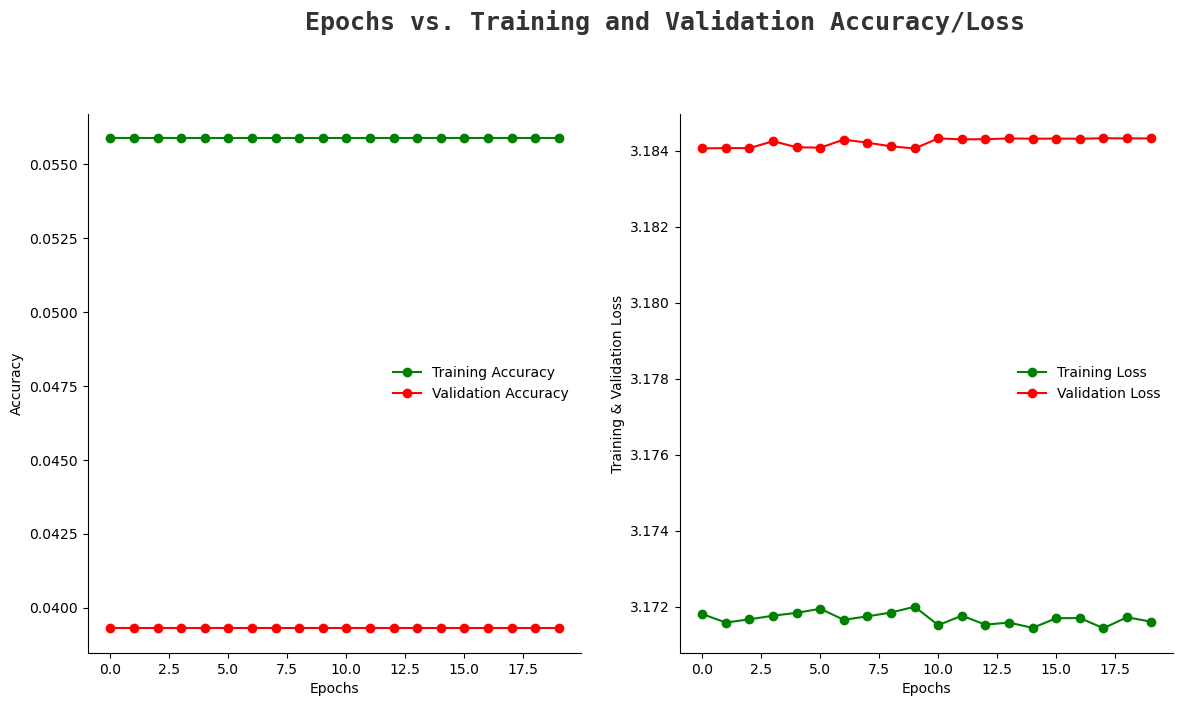

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined colors_green and colors_red
colors_green = ['green']  # Replace with your actual color definition
colors_red = ['red']      # Replace with your actual color definition

# Make sure the lists have the same length
epochs = [i for i in range(no_epochs)]
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'#, train_acc, val_acc, train_loss, val_loss')

for i in range(no_epochs):
    print(f'{i}, {train_acc[i]}, {val_acc[i]}, {train_loss[i]}, {val_loss[i]}')

# Modify the title text to use the color 'black' since colors_dark was not defined
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color='black', y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[0], color=colors_green[0],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[0], color=colors_red[0],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[0], color=colors_green[0],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[0], color=colors_red[0],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()

In [23]:
pred = alexmodel.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step


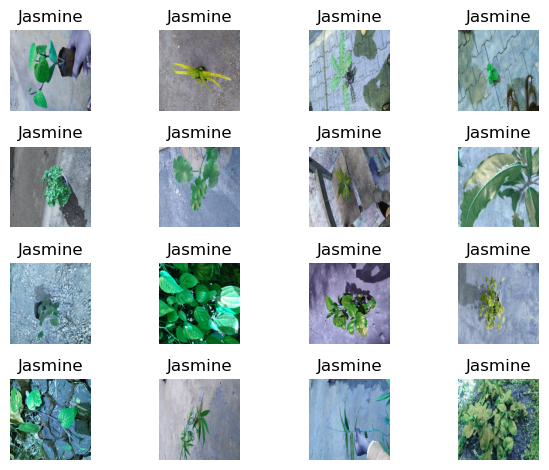

In [24]:
import matplotlib.pyplot as plt

# Get the predicted labels.
pred_lab = []
for p in pred:
    pred_lab.append(labels[p])

# Create a figure and a 4x4 grid of subplots.
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True)

# Iterate over the subplots and plot the predicted labels.
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(X_test[i*4+j])
        axs[i, j].set_title(pred_lab[i * 4 + j])
        axs[i, j].axis('off')

# Adjust the subplot layout.
fig.tight_layout() 

# Show the plot.
plt.show()

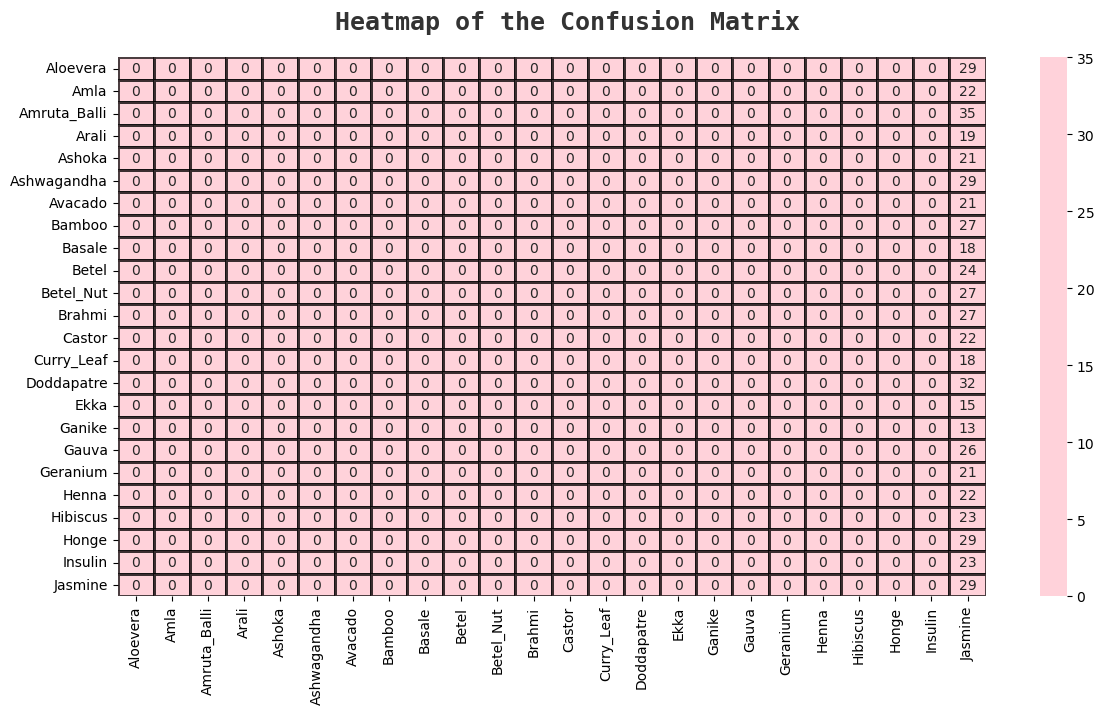

In [25]:
colors_green = ['pink']  # Replace with your color definitions
linecolor = 'black'

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
conf_matrix = confusion_matrix(y_test_new, pred)

sns.heatmap(conf_matrix, ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=linecolor)
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color=linecolor, y=0.92, x=0.28, alpha=0.8)

plt.show()